<a href="https://colab.research.google.com/github/Ivan-Dyncan/ImageComparison/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D1%81%D0%BE%D0%B4%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Генератор

In [ ]:
import cv2
import numpy as np
import random as rm
from google.colab.patches import cv2_imshow
import string


def random_point(img_shape):
  return (rm.randint(0,img_shape[0]), rm.randint(0,img_shape[1]))


def random_color(a=0, b=240):
  return (rm.randint(a, b), rm.randint(a, b), rm.randint(a, b))


def triangle(img, color):
    points = [random_point(img.shape) for i in range(3)]
    cv2.fillPoly(img, [np.array(points)], color)


def figure_creator(img):
  possible_figures = ["rectangle", "circle", "triangle"]
  figure = rm.choice(possible_figures)
  sh = img.shape

  if figure == "rectangle":
    cv2.rectangle(img, random_point(sh), random_point(sh), random_color(), thickness=cv2.FILLED)
  if figure == "circle":
    center = random_point(sh)
    cv2.circle(img, center, rm.randint(0, min(center[0], center[1], sh[0]-center[0], sh[1]-center[1])), random_color(), thickness=cv2.FILLED)
  if figure == "triangle":
    triangle(img, random_color())


def line_creator(img):
  sh = img.shape
  cv2.line(img, random_point(sh), random_point(sh), random_color(), 3)


def text_creator(img):
  letters = string.ascii_lowercase
  sh = img.shape
  cv2.putText(img, ''.join(rm.choice(letters) for i in range(rm.randint(1,5))), random_point(sh),cv2.FONT_HERSHEY_COMPLEX, 2, random_color())


def imgs_creator(sh, comand):
  comand = [(v[0], int(v[1:])) for v in comand.split()]
  dict_of_methods = {"f": figure_creator, "l": line_creator, "t": text_creator}
  res = []

  img = np.ones(sh)
  for c in comand:
    for count in range(c[1]):
      dict_of_methods[c[0]](img)
    res.append(img.copy())

  cv2_imshow(img)
  return res

Сохраняющий картинки метод

In [ ]:
import os.path

def save_images(images, folder_name="media"):
  f_name = f"/{folder_name}/count_of_same_sample.txt"
  if not os.path.exists(f_name):
    open(f_name, 'w').write("0")
  
  count_of_same_images = int(open(f_name, 'r').read(1))

  for i in range(len(images)):
    cv2.imwrite(f"/{folder_name}/sample{count_of_same_images}_{i}.jpg", images[i])
  
  open(f_name, 'w').write(str(count_of_same_images+1))

Запустите, чтобы сгенерировать <br>
Первый параметр, размеры картинок, 2ой - команды по созданию, где f-создать фигуру(треугольник, прямоугольник или круг), l-создать линию, t-создать текстовую строку. Числа после букв - это в каком каличестве будут созданы объекты, например f13 создаст 13 фигур <br>
От количества команд будет зависить, сколько картинок будет сохранено, например "f2 t3" создаст 2 картинки, на первой будет изображены 2 фигуры, на 2ой будт фигуры с прошлой картинки и + 3 надписи

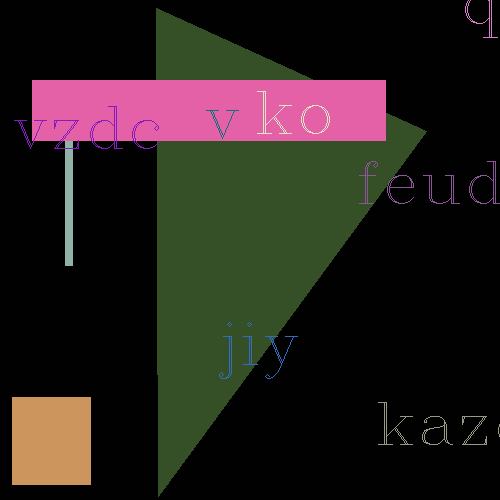

In [ ]:
images = imgs_creator((500,500,3), "f1 f3 t2 t5")

In [ ]:
save_images(images)